# Lead Score Case Study #

### Business Objective ###
An education company named X Education sells online courses to industry professionals.Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. The objective is to build a model to identify the hot/potential leads and achieve lead conversion rate to 80%. 

# Data Importing #

In [1]:
# filtering Warnings
import warnings
warnings.filterwarnings('ignore')

In [116]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import sklearn
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

## Data Reading ##

In [3]:
## importing csv file
lead = pd.read_csv("Leads.csv")

In [4]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
print(lead.shape)

(9240, 37)


In [7]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
print(lead.dtypes)

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [9]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning ##

### There are select values in many column, we will consider this as null and replace with NaN 

In [10]:
lead=lead.replace('Select', np.nan)

In [11]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
#Percentage of missing values in each column.
nullseries = round(lead.isnull().sum() * 100 / len(lead),2)
print(nullseries)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Columns with high missing values we will remove

In [13]:
lead.drop(['Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [14]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [15]:
lead.drop('Last Notable Activity', axis = 1, inplace=True)

In [16]:
#Percentage of missing values in each column.
nullseries = round(lead.isnull().sum() * 100 / len(lead),2)
print(nullseries)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Data Cleaning

#### Dropping columns having higher missing valus

In [17]:
#Checking columns having null value greater than or equal to 38%
print(nullseries[nullseries >= 38])

How did you hear about X Education    78.46
City                                  39.71
dtype: float64


In [18]:
lead = lead.drop(lead.loc[:,list((100*(lead.isnull().sum()/len(lead.index))>=38))].columns, 1)

In [19]:
#Percentage of missing values in each column.
nullseries = round(lead.isnull().sum() * 100 / len(lead),2)
print(nullseries)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### Data Cleaning - Combining unique categories

In [20]:
#Checking uniqueness in all categorical variables
lead['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [21]:
#Checking uniqueness in all categorical variables
lead['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

In [22]:
#Checking uniqueness in all categorical variables
lead['Do Not Email'].value_counts(normalize=True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [23]:
#Checking uniqueness in all categorical variables
lead['Do Not Call'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

In [24]:
#Checking uniqueness in all categorical variables
lead['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [25]:
#Checking uniqueness in all categorical variables
lead['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [26]:
#Checking uniqueness in all categorical variables
lead['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [27]:
#Checking uniqueness in all categorical variables
lead['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [28]:
#Checking uniqueness in all categorical variables
lead['What matters most to you in choosing a course'].value_counts(normalize=True) 

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [29]:
#Checking uniqueness in all categorical variables
lead['Search'].value_counts(normalize=True) 

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [30]:
#Checking uniqueness in all categorical variables
lead['Magazine'].value_counts(normalize=True) 

No    1.0
Name: Magazine, dtype: float64

In [31]:
#Checking uniqueness in all categorical variables
lead['Newspaper Article'].value_counts(normalize=True) 

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

In [32]:
lead['X Education Forums'].value_counts(normalize=True) 

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

In [33]:
lead['Digital Advertisement'].value_counts(normalize=True)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [34]:
lead['Through Recommendations'].value_counts(normalize=True) 

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

In [35]:
lead['Receive More Updates About Our Courses'].value_counts(normalize=True) 

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [36]:
lead['Get updates on DM Content'].value_counts(normalize=True)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [37]:
lead['Update me on Supply Chain Content'].value_counts(normalize=True) 

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [38]:
lead['I agree to pay the amount through cheque'].value_counts(normalize=True) 

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

In [39]:
lead['A free copy of Mastering The Interview'].value_counts(normalize=True)

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

### Dropping highly skewed collumns

In [40]:
lead.drop(['Do Not Email','Do Not Call','Country','What matters most to you in choosing a course', 
'Search','Magazine','Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content', 
'I agree to pay the amount through cheque'],axis=1,inplace=True)

In [41]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [42]:
#Percentage of missing values in each column.
nullseries = round(lead.isnull().sum() * 100 / len(lead),2)
print(nullseries)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
What is your current occupation           29.11
A free copy of Mastering The Interview     0.00
dtype: float64


In [43]:
print("Total number of columns :", len(lead.columns))

Total number of columns : 12


## Data Cleaning - Combining columns having low percentages into one single column.

#### Lead origin

In [44]:
#Inspecting the column again
lead['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [45]:
#Combining categories with very low row percentages as it does not make sense to create dummies for such rows.
lead['Lead Origin'] = lead['Lead Origin'].replace(['Lead Import','Quick Add Form'] ,'Others')

In [46]:
#Checking if the category has been correctly replaced. 
lead['Lead Origin'].value_counts(normalize=True) 

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Others                     0.006061
Name: Lead Origin, dtype: float64

####Now, Performing the same for other columns

#### Lead Score

In [48]:
#Inspecting Lead Source column.
lead['Lead Source'].value_counts(normalize=True) 

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

In [49]:
lead['Lead Source'] = lead['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','bing','google','Click2call', 
                                                   'Press_Release','Social Media','Live Chat','Pay per Click Ads','blog','WeLearn',
                                                   'youtubechannel','testone','NC_EDM' ,'welearnblog_Home'] ,'Others')

In [50]:
#Inspecting Lead Source column.
lead['Lead Source'].value_counts(normalize=True) 

Google            0.311604
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Others            0.038027
Name: Lead Source, dtype: float64

#### Lead Activity

In [51]:
lead['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [52]:
#Combining together to form 'Others' Categories. 
lead['Last Activity']=lead['Last Activity'].replace(['Form Submitted on Website'      ,
'Unreachable'                    ,
'Unsubscribed'                   ,
'Had a Phone Conversation'       ,
'Approached upfront'             ,
'View in browser link Clicked'   ,
'Email Received'                 ,
'Email Marked Spam'              ,
'Visited Booth in Tradeshow'     ,
'Resubscribed to emails'],'Others') 

In [53]:
#Inspecting 'Last Activity' column
lead['Last Activity'].value_counts(normalize=True) 

Email Opened               0.376163
SMS Sent                   0.300427
Olark Chat Conversation    0.106490
Page Visited on Website    0.070045
Converted to Lead          0.046843
Email Bounced              0.035679
Others                     0.035132
Email Link Clicked         0.029222
Name: Last Activity, dtype: float64

#### Specialization

In [54]:
#Inspecting the specialization column
lead['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [55]:
#Combining categories < 2%  into 'Others'
lead['Specialization']=lead['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence','Hospitality Management','E-COMMERCE','Retail Management'],'Others')      

In [56]:
lead['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Others                               0.084642
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Media and Advertising                0.034642
Travel and Tourism                   0.034642
International Business               0.030375
Healthcare Management                0.027133
Name: Specialization, dtype: float64

In [57]:
lead.Specialization.fillna('Not Specified', inplace=True)

In [58]:
#Inspecting the column again to recheck the same.
lead['Specialization'].value_counts(normalize=True)

Not Specified                        0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Others                               0.053680
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Name: Specialization, dtype: float64

#### Current Occupation

In [59]:
#Inspecting value counts for Current Occupation
lead['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [60]:
#Combining categories 
lead['What is your current occupation']=lead['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Others')

In [61]:
#Rechecking to find if the categories are correctly combined.
lead['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Others                  0.005191
Name: What is your current occupation, dtype: float64

### Imputing columns with low null value percentages

In [62]:
#Percentage of missing values in each column.
nullseries = round(lead.isnull().sum() * 100 / len(lead),2)
print(nullseries)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                             0.00
What is your current occupation           29.11
A free copy of Mastering The Interview     0.00
dtype: float64


### Imputing categorical values

In [63]:
#Imputing categorical columns with Mode
lead['Lead Source'].value_counts(normalize=True) 

Google            0.311604
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Others            0.038027
Name: Lead Source, dtype: float64

In [64]:
#Imputing missing values in 'Lead Source' with mode. 
lead['Lead Source'].fillna('Google',inplace=True)

In [65]:
#Imputing categorical columns with Mode
lead['Last Activity'].value_counts(normalize=True)

Email Opened               0.376163
SMS Sent                   0.300427
Olark Chat Conversation    0.106490
Page Visited on Website    0.070045
Converted to Lead          0.046843
Email Bounced              0.035679
Others                     0.035132
Email Link Clicked         0.029222
Name: Last Activity, dtype: float64

In [66]:
#Imputing missing values in 'Last Activity' with mode. 
lead['Last Activity'].fillna('Email Opened',inplace=True)

In [67]:
#Imputing categorical columns with Mode
lead['What is your current occupation'].value_counts(normalize=True) 

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Others                  0.005191
Name: What is your current occupation, dtype: float64

In [68]:
#Replacing categorical columns with Unemployed in Current Occupation 
lead['What is your current occupation'].fillna('Unemployed', inplace = True)

### Imputing numerical columns

In [69]:
#Since TotalVisits is a numerical column, we first inspect the data.
lead['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [70]:
#Imputing missing values in 'TotalVisits' with mean/median which is 3. 
lead['TotalVisits'].fillna(lead['TotalVisits'].median(),inplace=True)

In [71]:
#Checking for distribution
lead['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [72]:
#Page Per Views is also a numerical column, hence we check the distribution first.
lead['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

Observation : We can see that both mean and median ~ 2 and we can impute it with either, but we choose to impute it with median

In [74]:
#Imputing missing values with mean/median which is 2. 
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median(),inplace=True)

In [75]:
#Page Per Views is also a numerical column, hence we check the distribution first.
lead['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

### Cross-Checking for missing values again.

In [76]:
#Percentage of missing values in each column.
nullseries = round(lead.isnull().sum() * 100 / len(lead),2)
print(nullseries)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64


Observation : There are no more missing values, we have cleaned the data thoroughly.

In [78]:
#Row-wise null count
print(lead.isnull().sum(axis=1))

0       0
1       0
2       0
3       0
4       0
       ..
9235    0
9236    0
9237    0
9238    0
9239    0
Length: 9240, dtype: int64


### Duplicate Check

In [79]:
#Checking for any duplicates in the data.
lead.loc[lead.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview


### Observation : There are no duplicate rows in the dataset.

### EDA

In [80]:
#Displaying the data types on different columns
lead.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

EDA Numericcal values

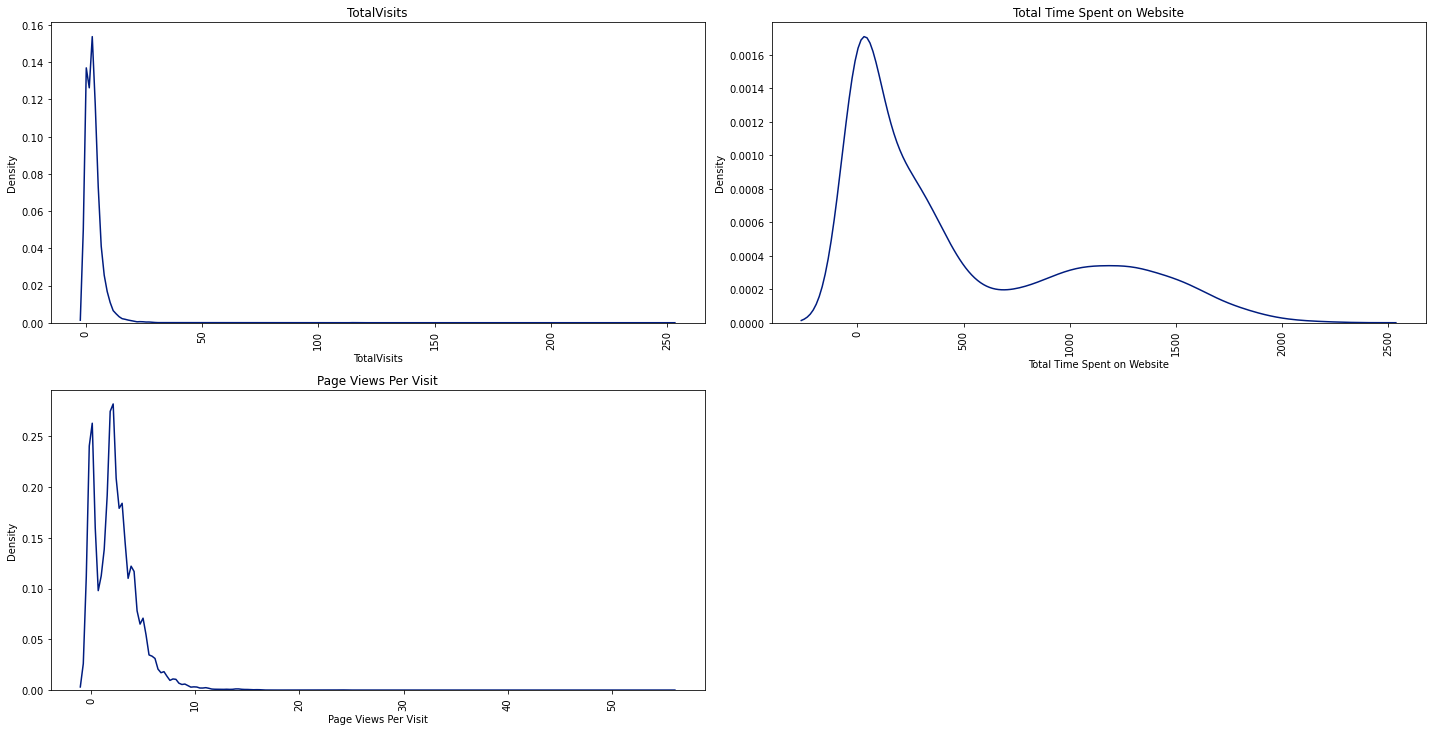

In [81]:
Required_columns= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
sns.set_palette("dark")
plt.figure(figsize = (20, 20))

for col in enumerate(Required_columns):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    sns.distplot(lead[col[1]], hist =False)
    plt.tight_layout()
    plt.xticks(rotation = 90)

### Observation :

Uni-variate Analysis - Numerical values:

The max probability for TotalVisits is found to be around 15-20. It increases initially but decreases further.

The max probability for PageViewsPerVisit is found to be around to be 3-5

The probability of time spent is found to be high for time between 0-300 seconds and decreases further.

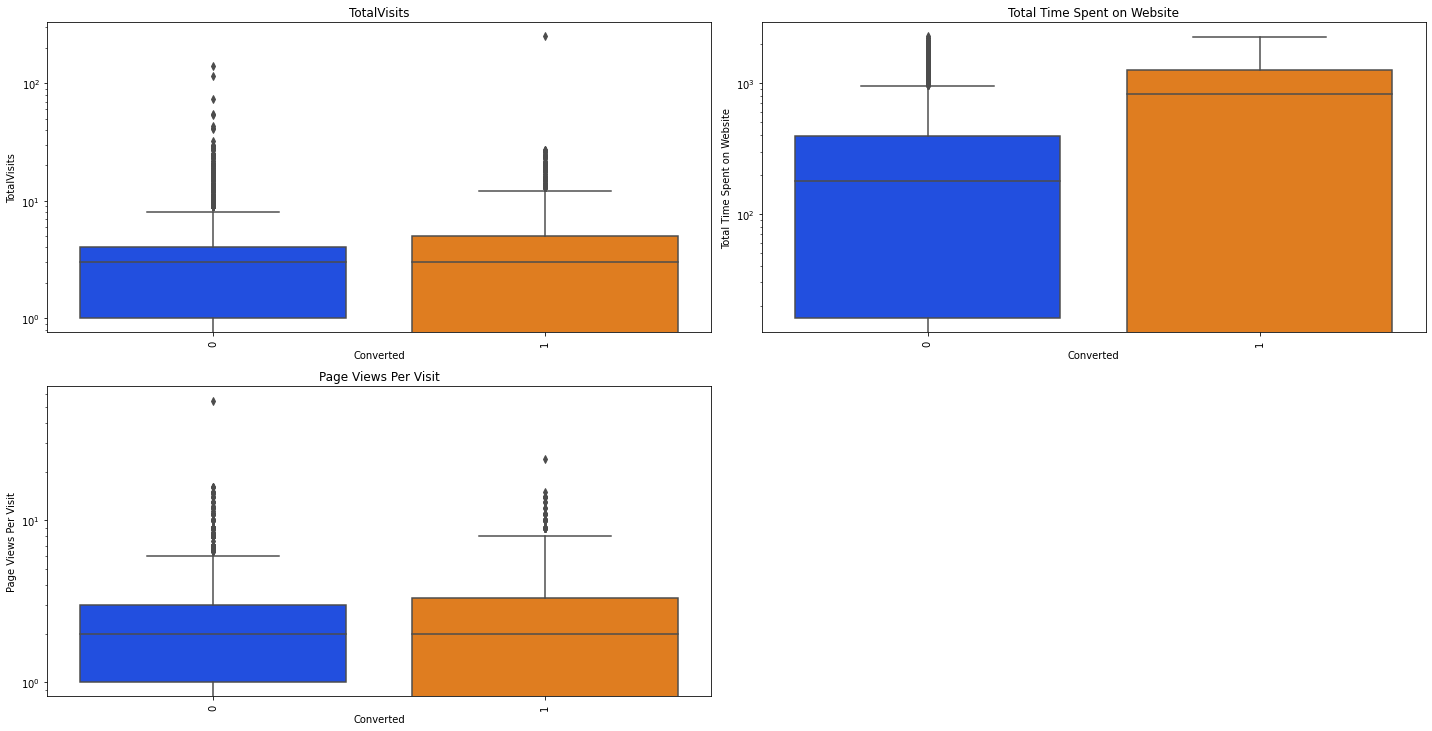

In [82]:
Required_columns= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
sns.set_palette("bright")
plt.figure(figsize = (20, 20))

for col in enumerate(Required_columns):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.boxplot(x='Converted', y=col[1], data = lead)
    ax.set_yscale('log')
    plt.tight_layout()
    plt.xticks(rotation = 90)

### Observation :

Bi-variate Analysis - Numerical values:

The mean is found to be higher in case of Converted people rather than non-converted people.

The average page views for both converted and non converted is found to be the same.

The average total visits for both converted and non converted people is found to be the same.

### EDA- Categorical values

In [83]:
#Copying from the lead dataframe for easier eda
leadCopy = lead.copy()

In [84]:
#Displaying the dataframe
leadCopy.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,No


In [85]:
leadCopy['Category'] = leadCopy.Converted.astype('category')

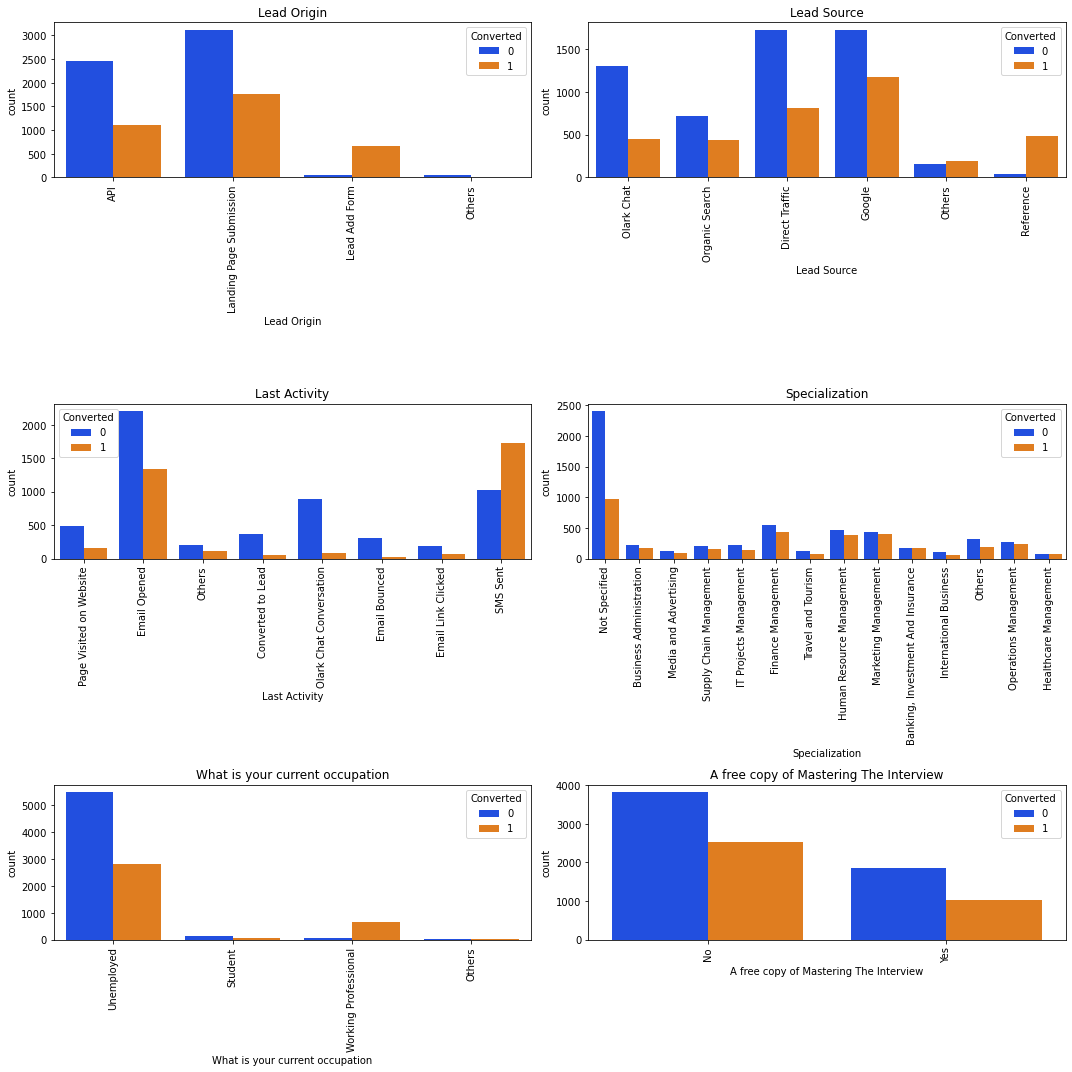

In [86]:
Required_columns= ['Lead Origin','Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview']
sns.set_palette("bright")

plt.figure(figsize = (15, 15))

for col in enumerate(Required_columns):
    plt.subplot(3, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.countplot(data = leadCopy, x=col[1], hue='Converted') 
    plt.xticks(rotation = 90)
    plt.tight_layout()

### **Univariate analysis for Categorical data**
- The percentage of Converted people is found to be greater for Landing Page Submission. We can also see that if Lead source is Add Form, the ratio of lead conversion is very high(almost not converted is very less).

- Google is found to be the important source for Lead Conversion

- We need to target people via Emails and SMS as it is found that the probability of response in case Converted leads is found to be higher.

- We cannot infer much about conversion rate from specialisation as people who do not select any specialisation can also be converted to a lead.But the ratio of non converted leads is higher than converted ones if they didn't choose specialisation.

- It is clearly visible from the graph that we need to target the Unemployed and Working Professional to get a higher conversion rate. The ratio of conversion rate is higher than not converted people for working professionals.

- People usually do not subscribe for a free copy of mastering the interview.

### Outliers Handling

In [87]:
#Inspectig the data types of all columns
lead.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

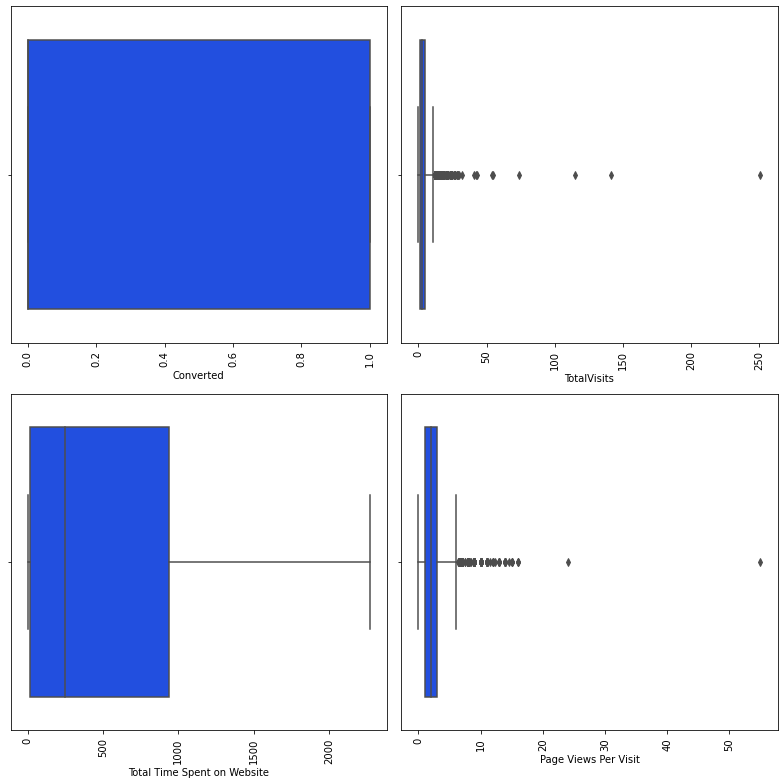

In [88]:
#There are 4 numerical columns - Converted , TotalVisits, Total Time Spent on Website, 'Page Views Per Visit
#Plotting them to check for outliers.

numerical_columns=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize = (11, 11))
sns.set_palette('bright')
for col in enumerate(numerical_columns):
    plt.subplot(2,2, col[0]+1)
    sns.boxplot(x = col[1], data = lead)
    plt.xticks(rotation = 90)
    plt.tight_layout()

In [89]:
#TotalVisits and Page Views Per Visit have outliers
lead['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [90]:
#diff1 will provide the difference between outliers and 99th percentile. 
#If the value is too big, we can conclude that there are outliers.
diff1 = lead.TotalVisits.max() - lead.TotalVisits.quantile(0.99)
diff1

234.0

In [91]:
lead['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [92]:
#diff2 will provide the difference between outliers and 99th percentile. 
#If the value is too big, we can conclude that there are outliers.
diff2 = lead['Page Views Per Visit'].max() - lead['Page Views Per Visit'].quantile(0.99)
diff2

46.0

### **Capping Outliers**

- We Perform Soft Capping.
- We check only for outliers in the upper range that are > 99th percentile.

In [93]:
req_cols=['TotalVisits','Page Views Per Visit'] 
for col in req_cols:
    percentiles = lead[col].quantile(0.99)  ## capping higher range outliers
    lead[col][lead[col] >= percentiles] = percentiles

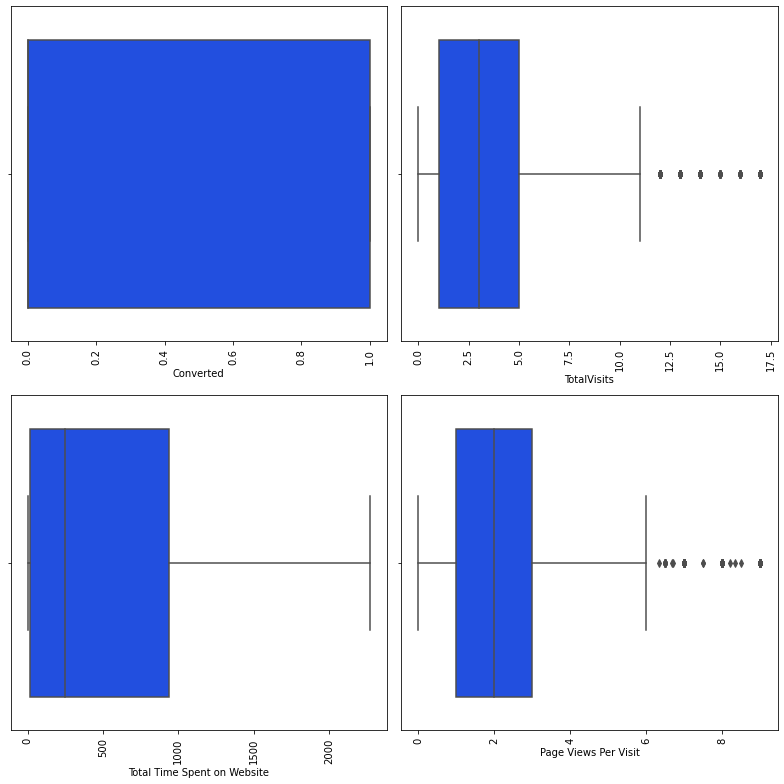

In [94]:
#Plotting the columns again to visualize after capping
numerical_columns=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

plt.figure(figsize = (11, 11))
sns.set_palette('bright')
for col in enumerate(numerical_columns):
    plt.subplot(2,2, col[0]+1)
    sns.boxplot(x = col[1], data = lead)
    plt.xticks(rotation = 90)
    plt.tight_layout()

###  Data Preparation

Following steps will be done as part of data preparation:

1. Converting binary variable (Yes/No) "A free copy of Mastering The Interview" to 1/0
2. Create dummies for categorical columns
3. Perform train-test split
4. Perform Scaling

In [96]:
varlist =['A free copy of Mastering The Interview']
def binary_map(x):
  return x.map({'Yes' : 1, "No": 0})

lead[varlist] = lead[varlist].apply(binary_map)

In [97]:
#Inspecting the data for the same. 
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,0


### **Preliminary step before creating dummies.**
- There are some columns with long names and this might be difficult for our analysis, hence we rename these columns.

In [98]:
#Checking for all columns
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [99]:
#Rename the columns
lead.rename(columns={'Total Time Spent on Website' : 'Time Spent', 'What is your current occupation':'Current Occupation', 'A free copy of Mastering The Interview':'Free Copy'}, inplace=True )

In [100]:
#Check if it has correctly been renamed 
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Time Spent', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Current Occupation', 'Free Copy'],
      dtype='object')

### Create Dummies for Categorical columns

In [101]:
#Checking for categorical columns in the dataframe.
lead.dtypes

Prospect ID              object
Lead Number               int64
Lead Origin              object
Lead Source              object
Converted                 int64
TotalVisits             float64
Time Spent                int64
Page Views Per Visit    float64
Last Activity            object
Specialization           object
Current Occupation       object
Free Copy                 int64
dtype: object

In [102]:
#Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['Lead Origin','Lead Source','Last Activity','Specialization','Current Occupation']], drop_first=True)

In [103]:
#Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)

In [104]:
#Checking if the dummy-variables are added into the dataframe correctly.
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Time Spent,Page Views Per Visit,Last Activity,Specialization,Current Occupation,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [105]:
#Dropping the original columns
lead.drop(['Lead Origin','Lead Source','Last Activity','Specialization','Current Occupation'],axis=1,inplace=True)

In [106]:
#Inspecting the dataframe again 
lead.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Time Spent,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


### **Checking the datatypes of all columns**

In [107]:
#Checking Datatypes
lead.dtypes

Prospect ID                                  object
Lead Number                                   int64
Converted                                     int64
TotalVisits                                 float64
Time Spent                                    int64
Page Views Per Visit                        float64
Free Copy                                     int64
Lead Origin_Landing Page Submission           uint8
Lead Origin_Lead Add Form                     uint8
Lead Origin_Others                            uint8
Lead Source_Google                            uint8
Lead Source_Olark Chat                        uint8
Lead Source_Organic Search                    uint8
Lead Source_Others                            uint8
Lead Source_Reference                         uint8
Last Activity_Email Bounced                   uint8
Last Activity_Email Link Clicked              uint8
Last Activity_Email Opened                    uint8
Last Activity_Olark Chat Conversation         uint8
Last Activit

### **Observation :** 
- **We can see that mostly all columns are already converted into Integer/Numerical datatype.**
- **Hence, we can continue with our evaluation.**

## Test-Train Data Split

In [108]:
#Importing the required libraries to divide the data into test data and training data.
from sklearn.model_selection import train_test_split

In [109]:
#Adding all feature columns to X Variable
X = lead.drop(['Converted','Prospect ID','Lead Number'], axis=1)

In [110]:
X.head()

,TotalVisits,Time Spent,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [111]:
#Adding our target column to Y Variable
y = lead['Converted']

In [112]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [113]:
# Splitting the data into train and test (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### **Scaling all the required variables**

In [114]:
#Checking the dataframe again
X.head()

,TotalVisits,Time Spent,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [117]:
#We can see that columns except TotalVisits, Time Spent and Page Views Per Visit all the other columns are present in the range of 0 - 1, so we need to scale these variables as well.
scaler = StandardScaler()
X_train[['TotalVisits','Time Spent','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Time Spent','Page Views Per Visit']])
X_train.head()

,TotalVisits,Time Spent,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
1871,-1.022595,-0.885371,-1.180474,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6795,0.205373,0.005716,-0.503379,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3516,0.512365,-0.691418,0.092260,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
8105,0.512365,1.365219,1.364995,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3934,-1.022595,-0.885371,-1.180474,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [118]:
#Checking the mean and standard deviation
X_train.describe()

,TotalVisits,Time Spent,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
count,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,-1.346411e-16,-1.609377e-16,-4.136731e-17,0.311843,0.528139,0.079468,0.005257,0.320037,0.190167,0.121058,0.036951,0.060297,0.036333,0.028293,0.381262,0.102195,0.033395,0.072047,0.300402,0.043599,0.105442,0.015615,0.091682,0.037260,0.018707,0.093383,0.020563,0.367502,0.057205,0.055040,0.037570,0.021336,0.021027,0.897805,0.077613
std,1.000077e+00,1.000077e+00,1.000077e+00,0.463282,0.499246,0.270489,0.072318,0.466527,0.392463,0.326219,0.188656,0.238054,0.187131,0.165822,0.485734,0.302929,0.179680,0.258586,0.458468,0.204218,0.307146,0.123991,0.288599,0.189414,0.135500,0.290991,0.141926,0.482162,0.232251,0.228076,0.190168,0.144512,0.143484,0.302929,0.267582
min,-1.022595e+00,-8.853708e-01,-1.180474e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.156027e-01,-8.634138e-01,-6.713803e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.016187e-01,-4.352528e-01,-1.622866e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.123653e-01,8.098906e-01,3.468071e-01,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,4.196269e+00,3.271816e+00,3.401369e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Observation : Standard Deviation is set to 1 and hence it is scaled correctly.

In [119]:
#Checking the Converted Rate before modelling
Converted_Rate = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted_Rate

38.53896103896104

### Observation : We can see that conversion rate before modelling is found to be around 38.53%

## Model Building

#### Model - I

In [120]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit()

In [121]:
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6432
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2687.3
Date:                Mon, 27 Feb 2023   Deviance:                       5374.6
Time:                        20:29:41   Pearson chi2:                 7.82e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3925
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [122]:
#Total number of columns
print(len(X_train.columns))

35


### Observation : We currently have around 35 columns for our evaluation.

### Model - II : Feature Selection using RFE

In [126]:
#Importing Logistic Regression module from SkLearn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [133]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg , step=20)
rfe = rfe.fit(X_train, y_train)

In [134]:
#Printing all the columns that are selected using RFE
rfe.support_

array([False,  True, False, False,  True,  True,  True, False,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False, False, False,  True,  True,  True])

In [135]:
#List of all columns on priority ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 2),
 ('Time Spent', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Free Copy', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Others', True, 1),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', False, 2),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 2),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 2),
 ('Specialization_Finance Management', False, 2),
 ('Specialization_Healthcare Management', False, 2),
 ('Specialization_Human Resource Management', False, 2),
 ('Specialization_IT Projects Management

In [136]:
col = X_train.columns[rfe.support_]

In [137]:
col

Index(['Time Spent', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Others',
       'Lead Source_Olark Chat', 'Lead Source_Others',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_International Business', 'Specialization_Not Specified',
       'Current Occupation_Student', 'Current Occupation_Unemployed',
       'Current Occupation_Working Professional'],
      dtype='object')

In [138]:
#Columns that have been rejected because of RFE.
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Free Copy',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Last Activity_Page Visited on Website',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism'],
      dtype='object')

### Assessing the model that has already been generated through RFE using Statsmodel - Model 2

In [139]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2728.0
Date:                Mon, 27 Feb 2023   Deviance:                       5455.9
Time:                        20:40:35   Pearson chi2:                 8.21e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3848
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [140]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [141]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Current Occupation_Unemployed,17.19
1,Lead Origin_Landing Page Submission,7.15
13,Specialization_Not Specified,4.61
8,Last Activity_Email Opened,4.25
11,Last Activity_SMS Sent,3.64
4,Lead Source_Olark Chat,2.41
9,Last Activity_Olark Chat Conversation,2.24
16,Current Occupation_Working Professional,2.23
2,Lead Origin_Lead Add Form,1.71
14,Current Occupation_Student,1.41


### **Observations:-**

- **We see there are many variables with a high P-value and VIF value.**
- **We need to continue model building process to improve the model.**
- **Factors that are needed for consideration : VIF < 5% and P-Value < 5%**

### **Model- III [Dropping Lead_Source Others]**

In [143]:
col = col.drop('Lead Source_Others')
col

Index(['Time Spent', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Others',
       'Lead Source_Olark Chat', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_International Business',
       'Specialization_Not Specified', 'Current Occupation_Student',
       'Current Occupation_Unemployed',
       'Current Occupation_Working Professional'],
      dtype='object')

In [144]:
print(len(col))

16


In [145]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2730.1
Date:                Mon, 27 Feb 2023   Deviance:                       5460.3
Time:                        21:15:31   Pearson chi2:                 8.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3844
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [146]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Current Occupation_Unemployed,17.19
1,Lead Origin_Landing Page Submission,7.13
12,Specialization_Not Specified,4.48
7,Last Activity_Email Opened,4.25
10,Last Activity_SMS Sent,3.63
4,Lead Source_Olark Chat,2.38
8,Last Activity_Olark Chat Conversation,2.24
15,Current Occupation_Working Professional,2.22
2,Lead Origin_Lead Add Form,1.63
13,Current Occupation_Student,1.41


### **Model - IV [Drop Lead Origin_Others]**

In [147]:
col = col.drop('Lead Origin_Others')
col

Index(['Time Spent', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_International Business', 'Specialization_Not Specified',
       'Current Occupation_Student', 'Current Occupation_Unemployed',
       'Current Occupation_Working Professional'],
      dtype='object')

In [148]:
print(len(col))

15


In [149]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2730.7
Date:                Mon, 27 Feb 2023   Deviance:                       5461.4
Time:                        21:16:45   Pearson chi2:                 8.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3843
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [150]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Current Occupation_Unemployed,17.11
1,Lead Origin_Landing Page Submission,7.05
11,Specialization_Not Specified,4.48
6,Last Activity_Email Opened,4.24
9,Last Activity_SMS Sent,3.63
3,Lead Source_Olark Chat,2.35
7,Last Activity_Olark Chat Conversation,2.24
14,Current Occupation_Working Professional,2.22
2,Lead Origin_Lead Add Form,1.61
12,Current Occupation_Student,1.41


#### **Model - V [Drop Current_Occupation_Student]**

In [151]:
col = col.drop('Current Occupation_Student')

In [152]:
print(col)

Index(['Time Spent', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_International Business', 'Specialization_Not Specified',
       'Current Occupation_Unemployed',
       'Current Occupation_Working Professional'],
      dtype='object')


In [153]:
print(len(col))

14


In [154]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2731.3
Date:                Mon, 27 Feb 2023   Deviance:                       5462.6
Time:                        21:20:27   Pearson chi2:                 8.44e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3842
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [155]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Current Occupation_Unemployed,12.47
1,Lead Origin_Landing Page Submission,5.87
11,Specialization_Not Specified,3.96
6,Last Activity_Email Opened,3.83
9,Last Activity_SMS Sent,3.39
3,Lead Source_Olark Chat,2.31
7,Last Activity_Olark Chat Conversation,2.14
13,Current Occupation_Working Professional,1.91
2,Lead Origin_Lead Add Form,1.54
4,Last Activity_Email Bounced,1.28


In [156]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Current Occupation_Unemployed,12.47
1,Lead Origin_Landing Page Submission,5.87
11,Specialization_Not Specified,3.96
6,Last Activity_Email Opened,3.83
9,Last Activity_SMS Sent,3.39
3,Lead Source_Olark Chat,2.31
7,Last Activity_Olark Chat Conversation,2.14
13,Current Occupation_Working Professional,1.91
2,Lead Origin_Lead Add Form,1.54
4,Last Activity_Email Bounced,1.28


**Model - VI [Drop Specialization_International Business]**

In [158]:
#Dropping "Specialization International_Business" for model building improvement
col = col.drop('Specialization_International Business', 1)
col

Index(['Time Spent', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Not Specified', 'Current Occupation_Unemployed',
       'Current Occupation_Working Professional'],
      dtype='object')

In [159]:
print(len(col))

13


In [160]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.5
Date:                Mon, 27 Feb 2023   Deviance:                       5464.9
Time:                        21:25:17   Pearson chi2:                 8.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3840
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

**Model - VII [Drop Last Activity_Email Link Clicked ]**

In [161]:
#Dropping "Last Activity Email Link Clicked" to improve the model.
col = col.drop('Last Activity_Email Link Clicked', 1)

In [162]:
#Printing all the required features considered for model building
print(col)

Index(['Time Spent', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Not Specified',
       'Current Occupation_Unemployed',
       'Current Occupation_Working Professional'],
      dtype='object')


In [163]:
print(len(col))

12


In [164]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2733.3
Date:                Mon, 27 Feb 2023   Deviance:                       5466.7
Time:                        21:26:47   Pearson chi2:                 8.44e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3838
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

**Inferences from the above model :-**

- **All P-Values are less than 5%, now lets check for VIF.**
- **The above model has 13 features, and we need to reduce it further.**

In [166]:
#Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [173]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Current Occupation_Unemployed,11.74
1,Lead Origin_Landing Page Submission,5.83
9,Specialization_Not Specified,3.93
5,Last Activity_Email Opened,3.31
8,Last Activity_SMS Sent,2.97
3,Lead Source_Olark Chat,2.28
6,Last Activity_Olark Chat Conversation,1.95
11,Current Occupation_Working Professional,1.83
2,Lead Origin_Lead Add Form,1.54
0,Time Spent,1.25


### **Current occupation_Unemployed has a high VIF of 11.74 and we need to reduce this further.**

**Model - VIII [Drop Current Occupation_Unemployed ]**

In [174]:
#Dropping "Current Occupation_Employed" because of high VIF
col = col.drop('Current Occupation_Unemployed', 1)

In [175]:
#Displaying all the features and the number of features for our model building. 
print(col)

Index(['Time Spent', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Not Specified',
       'Current Occupation_Working Professional'],
      dtype='object')


In [176]:
print(len(col))

11


In [177]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2736.1
Date:                Mon, 27 Feb 2023   Deviance:                       5472.2
Time:                        21:35:02   Pearson chi2:                 8.46e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3833
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [178]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.94
5,Last Activity_Email Opened,2.65
9,Specialization_Not Specified,2.59
8,Last Activity_SMS Sent,2.47
3,Lead Source_Olark Chat,2.18
6,Last Activity_Olark Chat Conversation,1.81
2,Lead Origin_Lead Add Form,1.40
0,Time Spent,1.25
4,Last Activity_Email Bounced,1.19
10,Current Occupation_Working Professional,1.19


**After multiple re-runs and improving the model upto 8 times, we can say that, all the selected features have a P-value < 5%. and VIF value < 5**

**Thus, 8th model is our final model.**

**Prediction of Y - values, as per the final model.**

In [180]:
#Getting the predicted values on the train set
#X_train_sm will provide the predictor variable. 
#res will contain the Logistic Regression model result
#y_train_Pred will provide us the Predicted Y Values for the given feature variables.

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.446724
6795    0.082272
3516    0.254976
8105    0.765301
3934    0.217713
4844    0.987625
3297    0.106118
8071    0.995375
987     0.184978
7423    0.863083
dtype: float64

In [181]:
#Reshaping the predicted probabilities so that it returns an array of Conversion_Probabilities.
y_train_pred = y_train_pred.values.reshape(-1)

### Creation of DataFrame - with the predicted Y values.

In [182]:
#Creating a data frame with the actual Converted score and Probability of conversion
#The dataframe is stored in the variable y_train_pred_final.

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Cust_Id'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id
0,0,0.446724,1871
1,0,0.082272,6795
2,0,0.254976,3516
3,0,0.765301,8105
4,0,0.217713,3934


In [183]:
#Mapping the prediction conversion Rate according to the probability cut off.
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id,predicted
0,0,0.446724,1871,0
1,0,0.082272,6795,0
2,0,0.254976,3516,0
3,0,0.765301,8105,1
4,0,0.217713,3934,0


### Calculation of Metrics for the final model

In [184]:
#Importing the required libraries for metric calculation
from sklearn import metrics

# Confusion matrix - Final Model 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3575  427]
 [ 818 1648]]


In [185]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8075139146567718


In [186]:
#Calculation of Final Model characteristics.
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [187]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6682887266828873

In [188]:
#Let's calculate specificity
TN / float(TN+FP)

0.8933033483258371

In [189]:
#Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10669665167416292


In [190]:
#Negative predictive value
print (TN / float(TN+ FN))

0.8137946733439563


ROC Curve and its parameters

In [191]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [192]:
#Calculation and FPR and TPR and thresholds for trade off Sensitivity and Specificity.
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

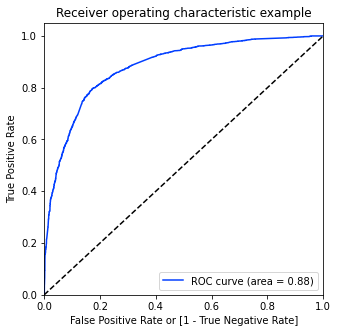

In [193]:
#Invoking the function to plot ROC - Curve. 
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### The ROC curve is plotted to find the trade off between Sensitivity and Specificity.

In [194]:
#Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.446724,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.082272,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.254976,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.765301,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.217713,3934,0,1,1,1,0,0,0,0,0,0,0


In [195]:
#Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.588590  0.971208  0.352824
0.2   0.2  0.724644  0.920519  0.603948
0.3   0.3  0.796228  0.835361  0.772114
0.4   0.4  0.817718  0.771290  0.846327
0.5   0.5  0.807514  0.668289  0.893303
0.6   0.6  0.794372  0.591241  0.919540
0.7   0.7  0.780767  0.515815  0.944028
0.8   0.8  0.753865  0.405921  0.968266
0.9   0.9  0.696197  0.218167  0.990755


Intersection between Accuracy - Sensitivity and Specificity

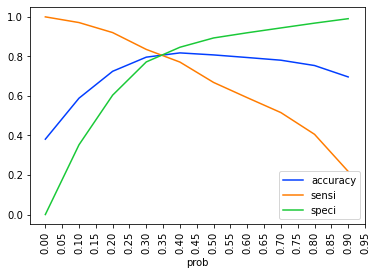

<Figure size 792x792 with 0 Axes>

In [196]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.05), rotation = 90)
plt.figure(figsize=(11,11))
plt.tight_layout()
plt.show()

### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

Calculation of predicted values on the score : 0.35

In [197]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.446724,1871,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.082272,6795,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.254976,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.765301,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.217713,3934,0,1,1,1,0,0,0,0,0,0,0,0


Metrics calculation for after choosing final probability cut off.

In [198]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8106060606060606

In [199]:
#Confusion matrix after probability cutoff : 0.35 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3261,  741],
       [ 484, 1982]], dtype=int64)

In [200]:
#Confusion Matrix - Calculating all parameters.
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [201]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8037307380373074

In [202]:
#Let us calculate specificity
TN / float(TN+FP)

0.8148425787106447

In [203]:
#Calculate false postive rate - predicting conversion rate when customer will be a hot lead or not
print(FP/ float(TN+FP))

0.18515742128935533


In [204]:
#Positive predictive value 
print (TP / float(TP+FP))

0.7278736687477048


In [205]:
#Negative predictive value
print (TN / float(TN+ FN))

0.8707610146862483


### **ACCURACY - SPECIFICITY - SENSITIVITY**

- ACCURACY - 81.06%
- SENSITIVITY - 80.37%
- SPECIFICITY - 81.48%

### Model Evaluation - ON TEST SET

In [206]:
#Perform all the scaling on the available features.
X_test[['TotalVisits','Time Spent','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Time Spent','Page Views Per Visit']])

In [207]:
#Selecting all the features, which are selected as per final model
#col has all the features available in the final model.

X_test = X_test[col]
X_test.head()

,Time Spent,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Not Specified,Current Occupation_Working Professional
4269,0.964504,0,0,0,0,0,0,0,1,1,0
2376,-0.885371,0,1,0,0,0,0,0,1,1,0
7766,-0.777416,0,0,0,0,0,0,1,0,0,1
9199,-0.885371,0,0,1,0,0,1,0,0,1,0
4359,-0.885371,0,1,0,0,1,0,0,0,0,0


**Building the model - ON TEST SET**

In [208]:
#Adding a constant for X_Test.
X_test_sm = sm.add_constant(X_test)

In [209]:
#y_test_pred - X_test_sm has all the features after model building
#res = > Result of model building

y_test_pred = res.predict(X_test_sm)

In [210]:
#Displaying all the predicted values
y_test_pred[:10]

4269    0.682267
2376    0.899342
7766    0.805863
9199    0.058790
4359    0.898066
9186    0.494068
1631    0.420546
8963    0.146228
8007    0.082309
5324    0.287909
dtype: float64

### Creating a dataframe with the predicted values

In [211]:
#Converting y_pred to a dataframe which is an array
y_test_pred_1 = pd.DataFrame(y_test_pred)
y_test_pred_1.head()

,0
4269,0.682267
2376,0.899342
7766,0.805863
9199,0.058790
4359,0.898066


In [212]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [213]:
#Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [214]:
#Removing index for both dataframes to append them side by side 
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [215]:
#Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)

In [216]:
y_pred_final.head()

,Converted,CustID,0
0,1,4269,0.682267
1,1,2376,0.899342
2,1,7766,0.805863
3,0,9199,0.058790
4,1,4359,0.898066


In [217]:
#Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [218]:
#Predicting the test model on cut off probabilty
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [219]:
#Displaying the predicted value dataframe.
y_pred_final.head()

,Converted,CustID,Conversion_Prob,final_predicted
0,1,4269,0.682267,1
1,1,2376,0.899342,1
2,1,7766,0.805863,1
3,0,9199,0.058790,0
4,1,4359,0.898066,1


### Calculation of Model Evaluation parameters

In [220]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8041125541125541

In [221]:
confusionTest= metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusionTest

array([[1359,  318],
       [ 225,  870]], dtype=int64)

In [222]:
TP = confusionTest[1,1] # true positive 
TN = confusionTest[0,0] # true negatives
FP = confusionTest[0,1] # false positives
FN = confusionTest[1,0] # false negatives

In [223]:
#Let's see the sensitivity of our logistic regression model
sensitivity = round(TP / float(TP+FN),2) *100 
print(sensitivity)

79.0


In [225]:
#Let's calculate specificity
TN / float(TN+FP)

0.8103756708407871

### **ACCURACY - SPECIFICITY - SENSITIVITY**

- ACCURACY - 80.41%
- SENSITIVITY - 79.0%
- SPECIFICITY - 81.03%

### **OBSERVATION** :

From our model, We can conclude following points :

1. The customer/leads who fills the form are the potential leads.

2. We must majorly focus on working professionals.

3. We must majorly focus on leads whose last activity is SMS sent or Email opened.

4. It’s always good to focus on customers, who have spent significant time on our website.

5. It’s better to focus least on customers to whom the sent mail is bounced back.

6. If the lead source is referral, he/she may not be the potential lead.

7. If the lead didn’t fill specialization, he/she may not know what to study and are not right people to target. So, it’s better to focus less on such cases.

### LEAD SCORE - ASSIGNMENT TO ALL CUSTOMERS

In [226]:
#Preparing the dataframe - to scale the variables and prepare the complete data.
X[['TotalVisits','Time Spent','Page Views Per Visit']] = scaler.transform(X[['TotalVisits','Time Spent','Page Views Per Visit']])

In [227]:
#Selecting the features in our final model on the scaled dataframe.
X = X[col]
X.head()

,Time Spent,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Not Specified,Current Occupation_Working Professional
0,-0.885371,0,0,1,0,0,0,0,0,1,0
1,0.347879,0,0,0,0,1,0,0,0,1,0
2,1.917803,1,0,0,0,1,0,0,0,0,0
3,-0.327298,1,0,0,0,0,0,1,0,0,0
4,1.727509,1,0,0,0,0,0,0,0,1,0


In [228]:
#Adding a constant to the dataframe
X_sm = sm.add_constant(X)

In [229]:
#Predicting the y-values on X dataframe (Leads.csv)
y_ans_pred = res.predict(X_sm)

In [230]:
#Printing the probabilities
y_ans_pred[:10]

0    0.112575
1    0.274402
2    0.666416
3    0.137250
4    0.203969
5    0.058790
6    0.711509
7    0.058790
8    0.103555
9    0.248045
dtype: float64

In [231]:
#Converting y_pred to a dataframe which is an array
y_ans_pred_df = pd.DataFrame(y_ans_pred)

In [232]:
#Converting y to dataframe
y_df = pd.DataFrame(y)

In [233]:
#Putting Lead_Number to index
y_df['Lead_Number'] = lead['Lead Number']

In [234]:
#Removing index for both dataframes to append them side by side 
y_ans_pred_df.reset_index(drop=True, inplace=True)
y_df.reset_index(drop=True, inplace=True)

In [235]:
#Appending y_test_df and y_df
y_ans_final = pd.concat([y_df, y_ans_pred_df],axis=1)

In [236]:
#Renaming the column 
y_ans_final= y_ans_final.rename(columns={ 0 : 'Conversion_Prob'})

In [237]:
#Displaying the Answer_Dataframe
y_ans_final.head()

,Converted,Lead_Number,Conversion_Prob
0,0,660737,0.112575
1,0,660728,0.274402
2,1,660727,0.666416
3,0,660719,0.137250
4,1,660681,0.203969


### Finding the converted value using the probability cut-off = 0.35

In [238]:
#Finding the Predicted values using the probability cut off
y_ans_final['final_predicted'] = y_ans_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [239]:
#Appending the score to the dataframe.
y_ans_final['Score'] = round(y_ans_final['Conversion_Prob'] * 100, 2)

In [240]:
#Displaying the predicted conversion on the final values
y_ans_final.head()

,Converted,Lead_Number,Conversion_Prob,final_predicted,Score
0,0,660737,0.112575,0,11.26
1,0,660728,0.274402,0,27.44
2,1,660727,0.666416,1,66.64
3,0,660719,0.137250,0,13.73
4,1,660681,0.203969,0,20.40


### Metric Calculation - Complete Dataframe

In [241]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_ans_final.Converted, y_ans_final.final_predicted)

0.8086580086580086

In [242]:
#Confusion Matrix
confusionAns= metrics.confusion_matrix(y_ans_final.Converted, y_ans_final.final_predicted)
confusionAns

array([[4620, 1059],
       [ 709, 2852]], dtype=int64)

In [243]:
#Confusion Matrix - Parameters
TP = confusionAns[1,1] # true positive 
TN = confusionAns[0,0] # true negatives
FP = confusionAns[0,1] # false positives
FN = confusionAns[1,0] # false negatives

In [244]:
# Let's see the sensitivity of our logistic regression model
sensitivity = round(TP / float(TP+FN),2) *100 
print(sensitivity)

80.0


In [245]:
# Let us calculate specificity
TN / float(TN+FP)

0.8135235076597993

### Sorting The Dataframe - To Find The Top Leads

In [247]:
#Sorting values to find the top leads. 
ResultDf = y_ans_final.sort_values(by='Score', ascending=False)

In [248]:
#Displaying the top leads
ResultDf.head()

,Converted,Lead_Number,Conversion_Prob,final_predicted,Score
2656,1,634047,0.999726,1,99.97
3478,1,627106,0.999707,1,99.97
8074,1,588037,0.999639,1,99.96
3428,1,627462,0.999532,1,99.95
5921,1,604411,0.999472,1,99.95


In [249]:
FilteredResult = ResultDf.loc[ResultDf['Score'] >= 35]

In [250]:
print(ResultDf.shape)
print(FilteredResult.shape)

(9240, 5)
(3911, 5)


In [251]:
FilteredResult.head(10)

,Converted,Lead_Number,Conversion_Prob,final_predicted,Score
2656,1,634047,0.999726,1,99.97
3478,1,627106,0.999707,1,99.97
8074,1,588037,0.999639,1,99.96
3428,1,627462,0.999532,1,99.95
5921,1,604411,0.999472,1,99.95
7579,1,591536,0.999442,1,99.94
6751,1,598055,0.999392,1,99.94
8081,1,588013,0.999246,1,99.92
9015,1,581257,0.999179,1,99.92
8063,1,588075,0.999145,1,99.91


In [252]:
#Checking the Converted Rate
Converted_Rate_AfterModelling= (sum(FilteredResult['Converted'])/len(FilteredResult['Converted'].index))*100
Converted_Rate_AfterModelling

72.9225262081309

#### Observation - We provide a list of only 4000 who have the chances of getting converted into a potential lead so it is easier for the company to limit their target. When we check for conversion rate, it is found to be around 73%.

##### Sorting The Dataframe - To Find The Hot Leads With Higher Conversion Rate.

In [254]:
HotLeads = ResultDf.loc[ResultDf['Score'] >= 95]

In [255]:
HotLeads.shape

(605, 5)

In [256]:
#Checking the Converted Rate
Converted_Rate_ForHotLeads= (sum(HotLeads['Converted'])/len(HotLeads['Converted'].index))*100
Converted_Rate_ForHotLeads

95.53719008264463

Here, we provide a list of only 600 who are mostly getting converted to a lead, so it is easier for the company to limit their target. When we check for conversion rate, it is found to be around 96%. This list aims to target the top 10% of the customers.

#### **CONCLUSION**
Conversion Rate for hot leads is increases from 73% to 96%. This means they have a 96% probability of getting converted to a lead.

Focusing on Hot Leads will increase the chances of obtaining more value to the business as the number of people we contact are less but the conversion rate is high.

**From our model, we can conclude following points :**

- The customer/leads who fills the form are the potential leads.
- We must majorly focus on working professionals.
- We must majorly focus on leads whose last activity is SMS sent or Email opened.
- It’s always good to focus on customers, who have spent significant time on our website.
- It’s better to focus least on customers to whom the sent mail is bounced back.
- If the lead source is referral, he/she may not be the potential lead.
- If the lead didn’t fill specialization, he/she may not know what to study and are not right people to target. So, it’s better to focus less on such cases.



### **RECOMMENDATIONS**

- It’s good to collect data often and run the model and get updated with the potential leads. There is a belief that the best time to call your potential leads is within few hours after the lead shows interest in the courses.

- Along with phone calls, it’s good to mail the leads also to keep them reminding as email is as powerful as cold calling.

- Reducing the number of call attempts to 2-4 and increasing the frequency of usage of other media like advertisements in Google, or via emails to keep in touch with the lead will save a lot of time.

- Focusing on Hot Leads will increase the chances of obtaining more value to the business as the number of people we contact are less but the conversion rate is high.